In [9]:
# Had issues installing pyreadstat so used magic command in notebook instead
# %pip install pyreadstat

import glob
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pathlib import Path

# Establish path to data folder
FILEPATH = Path('/Volumes/WRKGRP/STD-FSW-BSI-SD-Movement_Tracking/dsp/data/02_interim')

# Load df
master = pd.read_excel(FILEPATH / 'dataset_partial_2025-05-14_15-20.xlsx')

# Hypotheses

* **Hypothesis 1:** Higher IOP positively correlates with higher STRS and SPARTS.
* **Hypothesis 2:** Higher IOP positively correlates with closer proximity. 
    * *But how are we going to define proximity? Maybe determine a range for how many times a day teacher approached student (also need to determine how long they need to stay next to the student to count as approaching), and how much time total the teacher spent close to student?--MC, 11-04-2025*
* **Hypothesis 3:** Higher implicit proximity (XYZ) correlates with higher STRS and SPARTS.


**Unilateral relationships:** need only teacher score or only student score.

**Bilateral relationships:** need both teacher and student score.

# SPARTS
## Summary statistics and distribution

In [10]:
print('Raw descriptives for SPARTS_total scores:')
master['SPARTS_total'].describe()

Raw descriptives for SPARTS_total scores:


count    106.000000
mean      51.103774
std        7.185871
min       27.000000
25%       47.250000
50%       53.000000
75%       56.750000
max       60.000000
Name: SPARTS_total, dtype: float64

Student relationships with teachers are overall positive; only one negative outlier found (warrants further inspection, will not be excluded).

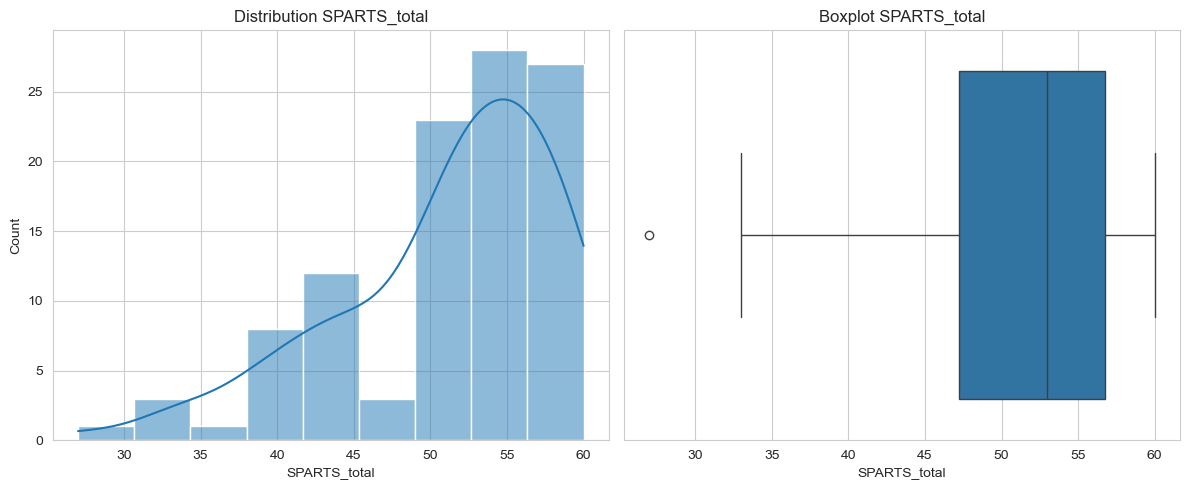

In [17]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Histogram with KDE
sns.histplot(
    data=master,
    x='SPARTS_total',
    kde=True,
    ax=axes[0]  # Plot on the first subplot
)
axes[0].set_title('Distribution SPARTS_total')

# Boxplot
sns.boxplot(
    data=master,
    x='SPARTS_total',
    ax=axes[1]  # Plot on the second subplot
)
axes[1].set_title('Boxplot SPARTS_total')

plt.tight_layout()
plt.show()


Further inspection of SPARTS scores confirms match with total scores: higher frequency of positive closeness scores ~~ higher frequency of negative closeness scores. 

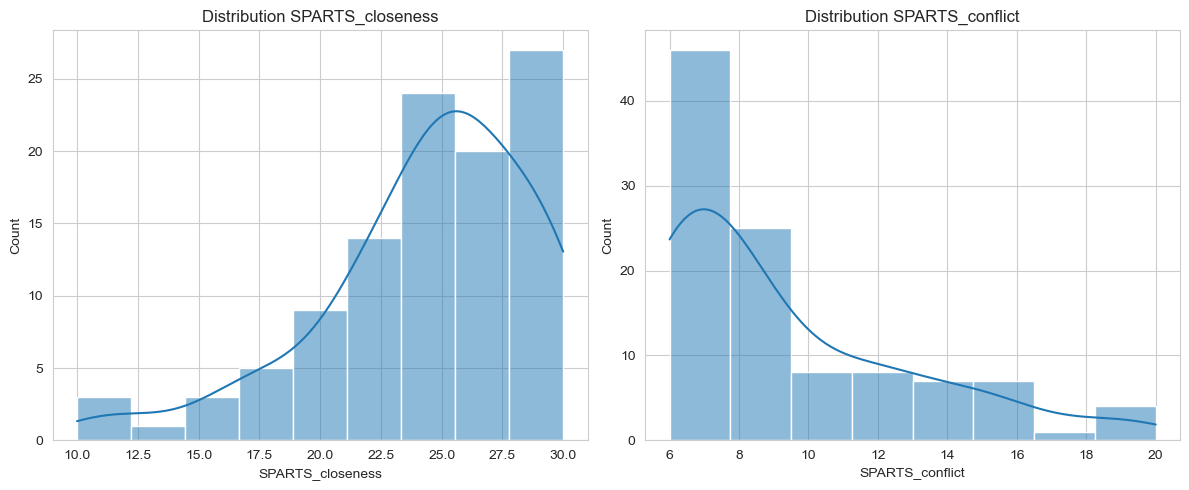

In [12]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.histplot(
    data=master,
    x='SPARTS_closeness',
    kde=True,
    ax=axes[0]  # Plot on subplot 1
)
axes[0].set_title('Distribution SPARTS_closeness')

sns.histplot(
    data=master,
    x='SPARTS_conflict',
    kde = True,
    ax=axes[1]  # Plot on subplot 2
)
axes[1].set_title('Distribution SPARTS_conflict')

plt.tight_layout()
plt.show()

## Normalized scores

Just a first attempt at normalizing the scores here to use in comparison with other scores. Sample st dev used instead of population, as I'm assuming we're generalizing these results (do correct me if I'm wrong). 

In [15]:
from scipy.stats import zscore

master['zSPARTS_total'] = zscore(master['SPARTS_total'], ddof=1)  # Sample population st dev; generalization
# outliers = sparts[np.abs(sparts['SPARTS_total_z']) > 3]
# print(f"Number of outliers (|z| > 3): {len(outliers)}")
master['zSPARTS_total'].describe()

count    1.060000e+02
mean     3.351617e-17
std      1.000000e+00
min     -3.354329e+00
25%     -5.362987e-01
50%      2.638826e-01
75%      7.857400e-01
max      1.238016e+00
Name: zSPARTS_total, dtype: float64

## Descriptives (again)

**08-05-2025:** Forgot to do these. Will merge this code with cells above for better flow. 

count    106.000000
mean      11.084906
std        0.817871
min        9.000000
25%       10.250000
50%       11.000000
75%       12.000000
max       13.000000
Name: age, dtype: float64

school
42    1
43    1
45    2
46    1
47    1
Name: class, dtype: int64